# PROJET STATISTIQUE INFERENTIELLE

# Prétraitement des données

## Importation

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from scipy.stats.mstats import winsorize

In [109]:
file_path = r"C:/Users/DELL/OneDrive/Desktop/INSSEDS/Small Project Stat Inferentielle/Student_Depression.csv"
data = pd.read_csv(file_path)

In [111]:
data

,id,sexe,age,ville,profession,pression_academique,pression_liee_au_travail,moyenne_notes,satisfaction_etudes,satisfaction_travail,duree_sommeil,habitudes_alimentaires,diplome_suivi,pensees_suicidaire,nombre_heure_travail_etude,stress_financier,antecedants_familiaux_maladie_mentale,depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [113]:
data.dtypes

id                                         int64
sexe                                      object
age                                      float64
ville                                     object
profession                                object
pression_academique                      float64
pression_liee_au_travail                 float64
moyenne_notes                            float64
satisfaction_etudes                      float64
 satisfaction_travail                    float64
duree_sommeil                             object
habitudes_alimentaires                    object
diplome_suivi                             object
pensees_suicidaire                        object
nombre_heure_travail_etude               float64
stress_financier                         float64
antecedants_familiaux_maladie_mentale     object
depression                                 int64
dtype: object

## Traitement de doublons

In [116]:
data.duplicated().sum()

0

In [118]:
doublons = data[data.duplicated(keep = False)]

In [120]:
doublons

,id,sexe,age,ville,profession,pression_academique,pression_liee_au_travail,moyenne_notes,satisfaction_etudes,satisfaction_travail,duree_sommeil,habitudes_alimentaires,diplome_suivi,pensees_suicidaire,nombre_heure_travail_etude,stress_financier,antecedants_familiaux_maladie_mentale,depression


In [122]:
data[data.duplicated()]

,id,sexe,age,ville,profession,pression_academique,pression_liee_au_travail,moyenne_notes,satisfaction_etudes,satisfaction_travail,duree_sommeil,habitudes_alimentaires,diplome_suivi,pensees_suicidaire,nombre_heure_travail_etude,stress_financier,antecedants_familiaux_maladie_mentale,depression


In [124]:
# Afficher les doublons triés pour faciliter la comparaison
doublons.sort_values(by=data.columns.tolist())

,id,sexe,age,ville,profession,pression_academique,pression_liee_au_travail,moyenne_notes,satisfaction_etudes,satisfaction_travail,duree_sommeil,habitudes_alimentaires,diplome_suivi,pensees_suicidaire,nombre_heure_travail_etude,stress_financier,antecedants_familiaux_maladie_mentale,depression


In [126]:
data = data.drop_duplicates()

In [128]:
data.duplicated().sum()

0

## Formatage

In [131]:
data = data.drop(['id'], axis = 1)

In [133]:
variable = [
'sexe', 'ville', 'profession', 'duree_sommeil', 'habitudes_alimentaires', 
'diplome_suivi', 'pensees_suicidaire',
'antecedants_familiaux_maladie_mentale', 'depression']

for col in variable:
    data[col] = data[col].astype('category')

data['sexe'] = data['sexe'].replace({"Male": "Homme", "Female": "Femme"})
data['pensees_suicidaire'] = data['pensees_suicidaire'].replace({"No": "Non", "Yes": "Oui"})
data['antecedants_familiaux_maladie_mentale'] = data['antecedants_familiaux_maladie_mentale'].replace({"No": "Non", "Yes": "Oui"})
data['depression'] = data['depression'].replace({0: "Non", 1: "Oui"})

In [135]:
print(data.columns.tolist())

['id', 'sexe', 'age', 'ville', 'profession', 'pression_academique', 'pression_liee_au_travail', 'moyenne_notes', 'satisfaction_etudes', ' satisfaction_travail', 'duree_sommeil', 'habitudes_alimentaires', 'diplome_suivi', 'pensees_suicidaire', 'nombre_heure_travail_etude', 'stress_financier', 'antecedants_familiaux_maladie_mentale', 'depression']


In [137]:
data.columns = data.columns.str.strip()

In [139]:
data.dtypes

id                                          int64
sexe                                     category
age                                       float64
ville                                    category
profession                               category
pression_academique                       float64
pression_liee_au_travail                  float64
moyenne_notes                             float64
satisfaction_etudes                       float64
satisfaction_travail                      float64
duree_sommeil                            category
habitudes_alimentaires                   category
diplome_suivi                            category
pensees_suicidaire                       category
nombre_heure_travail_etude                float64
stress_financier                          float64
antecedants_familiaux_maladie_mentale    category
depression                               category
dtype: object

## Visualisation des valeurs manquantes

In [142]:
data.isnull().sum()

id                                       0
sexe                                     0
age                                      0
ville                                    0
profession                               0
pression_academique                      0
pression_liee_au_travail                 0
moyenne_notes                            0
satisfaction_etudes                      0
satisfaction_travail                     0
duree_sommeil                            0
habitudes_alimentaires                   0
diplome_suivi                            0
pensees_suicidaire                       0
nombre_heure_travail_etude               0
stress_financier                         3
antecedants_familiaux_maladie_mentale    0
depression                               0
dtype: int64

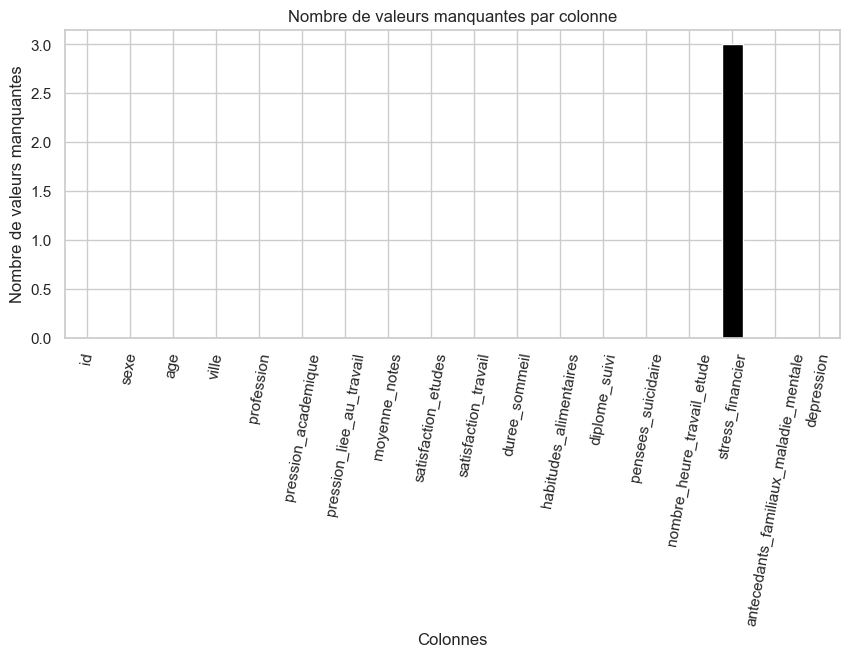

In [144]:
missing_values = data.isnull().sum()

# Visualiser les valeurs manquantes
plt.figure(figsize=(10, 4))
missing_values.plot(kind='bar', color='black')
plt.title('Nombre de valeurs manquantes par colonne')
plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.xticks(rotation=80)
plt.savefig('image1.png')
plt.show()

## Traitement des valeurs manquantes 

In [147]:
nbr_missing_values = data.isnull().any(axis = 1).sum()
percentage = nbr_missing_values / len(data)

In [149]:
percentage

0.00010752302784846421

In [151]:
data = data.dropna()

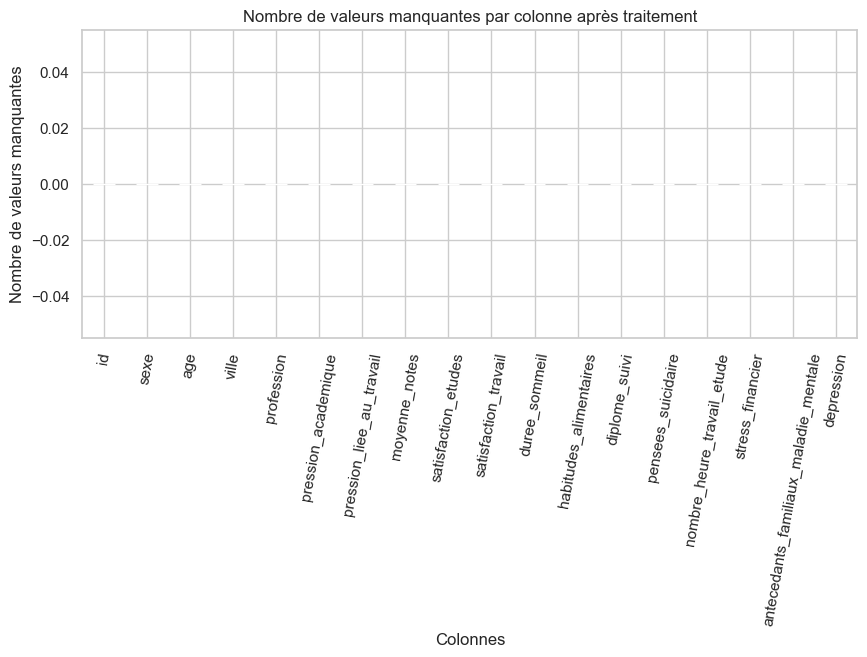

In [153]:
missing_values = data.isnull().sum()

# Visualiser les valeurs manquantes
plt.figure(figsize=(10, 4))
missing_values.plot(kind='bar', color='black')
plt.title('Nombre de valeurs manquantes par colonne après traitement')
plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.xticks(rotation=80)
plt.savefig('image2.png')
plt.show()

## Visualisation des valeurs aberrantes

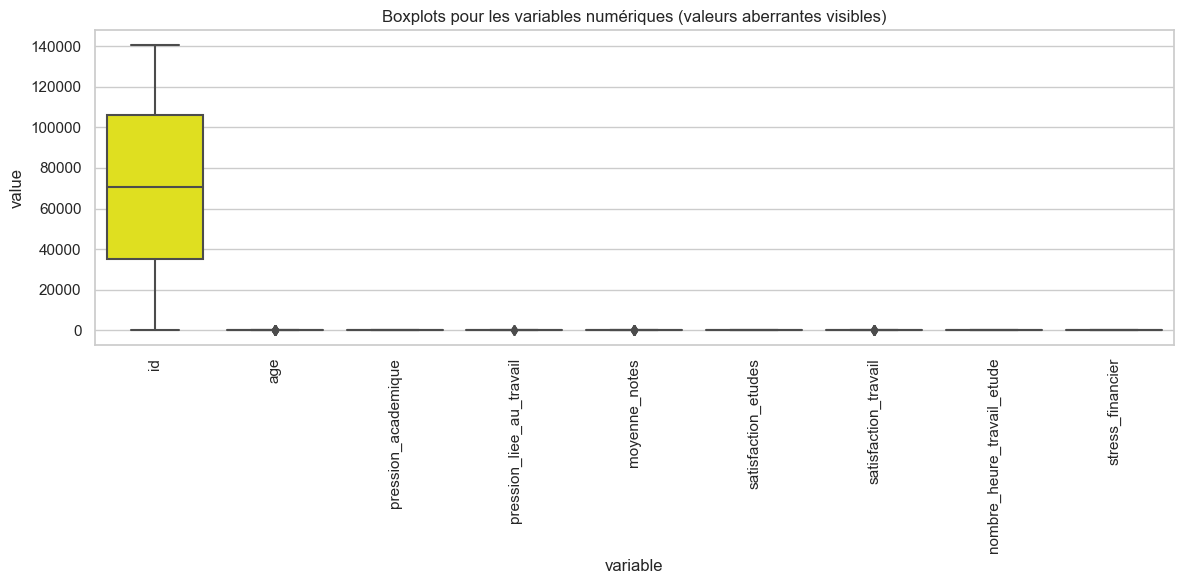

In [156]:
# Sélection des variables numériques uniquement
num_data = data.select_dtypes(include=['float64', 'int64'])

# Transformation en format "long" pour Seaborn
num_data_long = pd.melt(num_data)

# 📊 Boxplot groupé par variable
plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', data=num_data_long, color="yellow")
plt.title("Boxplots pour les variables numériques (valeurs aberrantes visibles)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('image3.png')
plt.show()


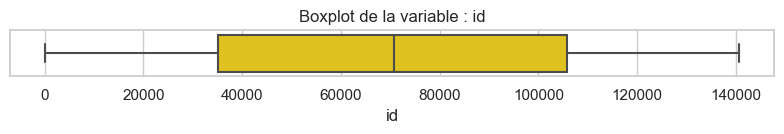

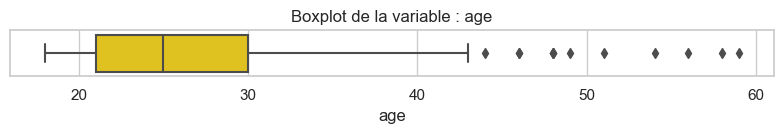

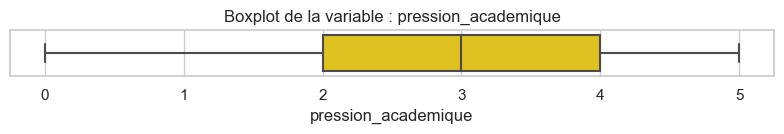

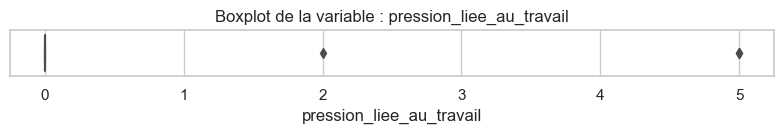

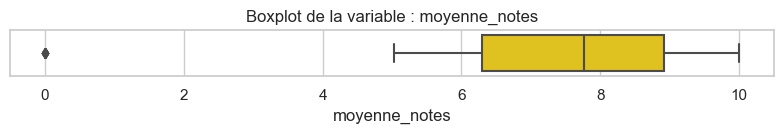

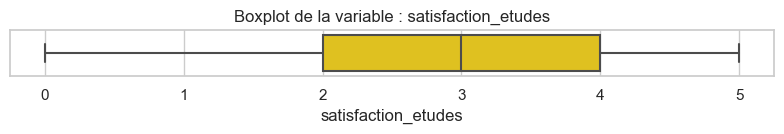

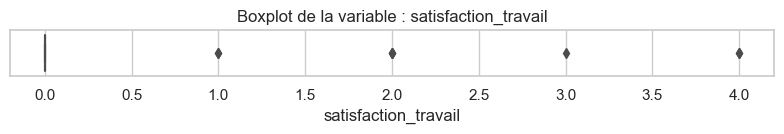

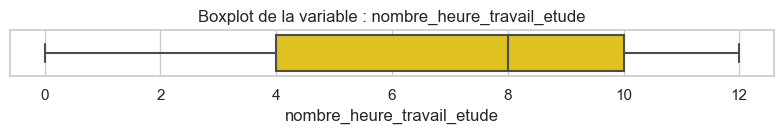

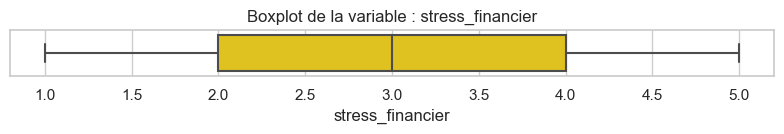

In [158]:
# Sélection des variables numériques
num_data = data.select_dtypes(include=['float64', 'int64'])

# 📊 Un boxplot par variable numérique
for col in num_data.columns:
    plt.figure(figsize=(8, 1.5))  # format adapté aux boxplots horizontaux
    sns.boxplot(x=data[col], color="gold")
    plt.title(f"Boxplot de la variable : {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.savefig('image4.png')
    plt.show()


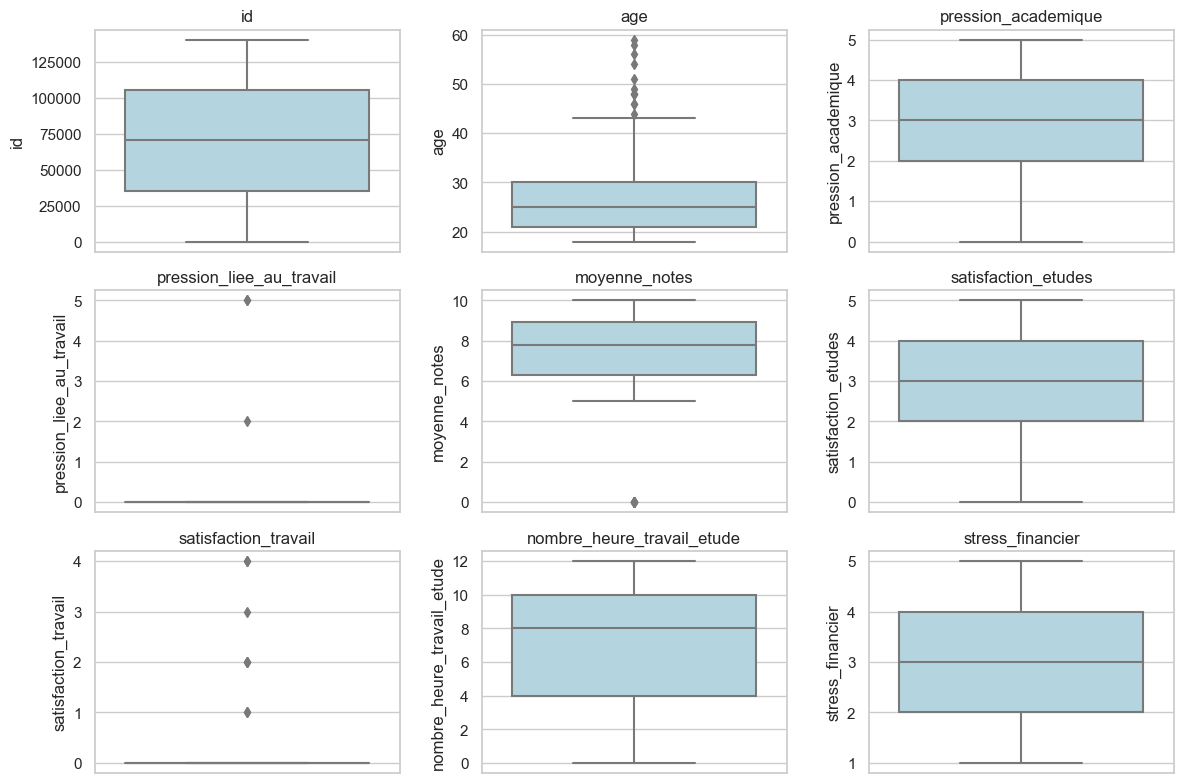

In [159]:
num_vars = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

plt.figure(figsize=(12, 8))
for i, var in enumerate(num_vars, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[var], color='lightblue')
    plt.title(f"{var}")
plt.tight_layout()
plt.savefig('image5.png')
plt.show()

## Traitemanrt des valeurs aberrantes

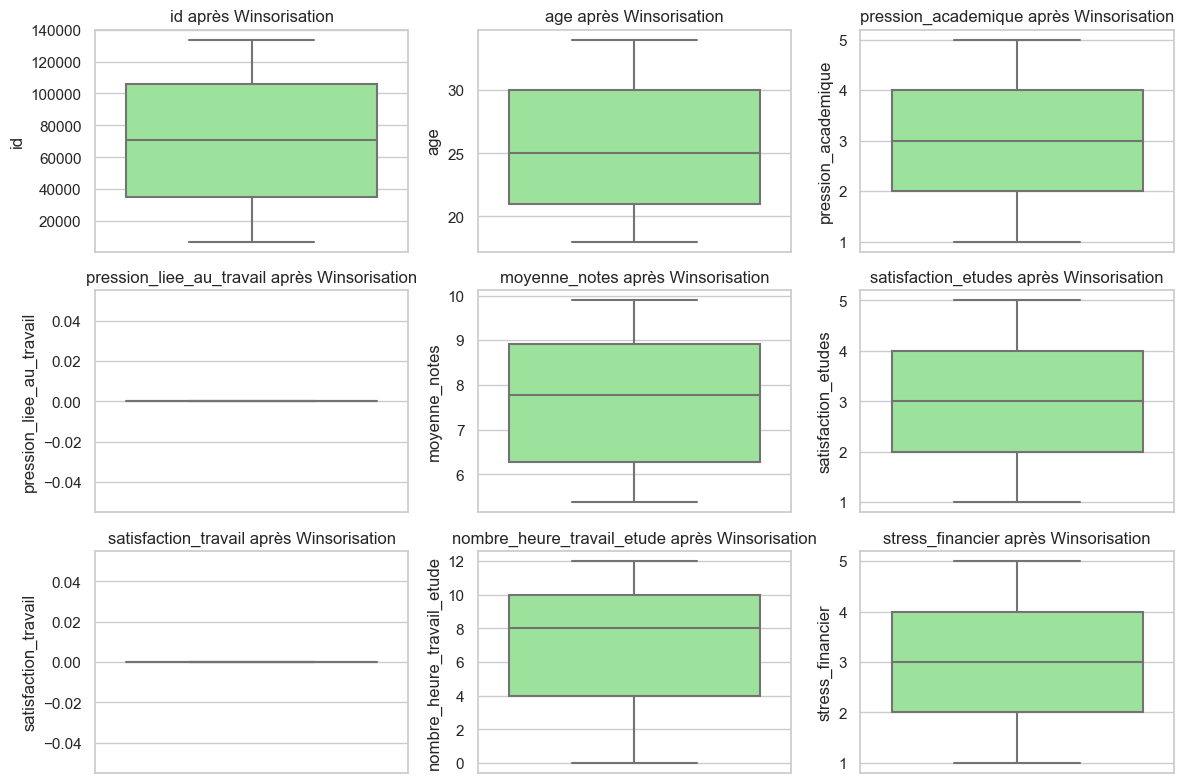

In [162]:
# Winsorisation sur les variables numériques (limiter à 5% de chaque extrême)
for var in num_vars:
    data[var] = winsorize(data[var], limits=[0.05, 0.05])

# Après winsorisation : visualisation par boxplots
plt.figure(figsize=(12, 8))
for i, var in enumerate(num_vars, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[var], color='lightgreen')
    plt.title(f"{var} après Winsorisation")
plt.tight_layout()
plt.savefig('image6.png')
plt.show()

# Sauvegarde du fichier nettoyé

In [166]:
data.to_csv("C:/Users/DELL/OneDrive/Desktop/INSSEDS/Small Project Stat Inferentielle/Student_Depression_cleaned.csv",  index=False, sep=';', decimal= ',', encoding = "utf-8")

# Analyse univariée

## Etude des variables qualitatives

In [67]:
import scipy.stats as stats

# 1. Variables numériques et catégorielles
quantitative_vars_base = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
qualitative_vars_base = data.select_dtypes(include='category').columns.tolist()

# 2. Analyse des variables numériques
print("\n🔢 Analyse univariée des variables numériques :")
for var in quantitative_vars_base:
    print(f"\n--- {var} ---")
    print(f"Moyenne : {data[var].mean():.2f}")
    print(f"Médiane : {data[var].median():.2f}")
    print(f"Mode : {data[var].mode()[0]:.2f}")
    print(f"Écart-type : {data[var].std():.2f}")
    print(f"Variance : {data[var].var():.2f}")
    print(f"Min : {data[var].min():.2f} | Max : {data[var].max():.2f}")
    print(f"Asymétrie (Skewness) : {stats.skew(data[var]):.2f}")
    print(f"Aplatissement (Kurtosis) : {stats.kurtosis(data[var]):.2f}")

# 3. Analyse des variables catégorielles
print("\n📅 Analyse univariée des variables catégorielles :")
for var in qualitative_vars_base:
    print(f"\n--- {var} ---")
    print(data[var].value_counts())
    print("\nProportions :")
    print(data[var].value_counts(normalize=True).round(2))



🔢 Analyse univariée des variables numériques :

--- age ---
Moyenne : 25.81
Médiane : 25.00
Mode : 24.00
Écart-type : 4.87
Variance : 23.72
Min : 18.00 | Max : 34.00
Asymétrie (Skewness) : 0.07
Aplatissement (Kurtosis) : -1.18

--- pression_academique ---
Moyenne : 3.14
Médiane : 3.00
Mode : 3.00
Écart-type : 1.38
Variance : 1.91
Min : 1.00 | Max : 5.00
Asymétrie (Skewness) : -0.13
Aplatissement (Kurtosis) : -1.16

--- pression_liee_au_travail ---
Moyenne : 0.00
Médiane : 0.00
Mode : 0.00
Écart-type : 0.00
Variance : 0.00
Min : 0.00 | Max : 0.00
Asymétrie (Skewness) : nan
Aplatissement (Kurtosis) : nan

--- moyenne_notes ---
Moyenne : 7.66
Médiane : 7.77
Mode : 9.89
Écart-type : 1.45
Variance : 2.09
Min : 5.38 | Max : 9.89
Asymétrie (Skewness) : -0.05
Aplatissement (Kurtosis) : -1.27

--- satisfaction_etudes ---
Moyenne : 2.94
Médiane : 3.00
Mode : 4.00
Écart-type : 1.36
Variance : 1.85
Min : 1.00 | Max : 5.00
Asymétrie (Skewness) : 0.01
Aplatissement (Kurtosis) : -1.23

--- satisfact

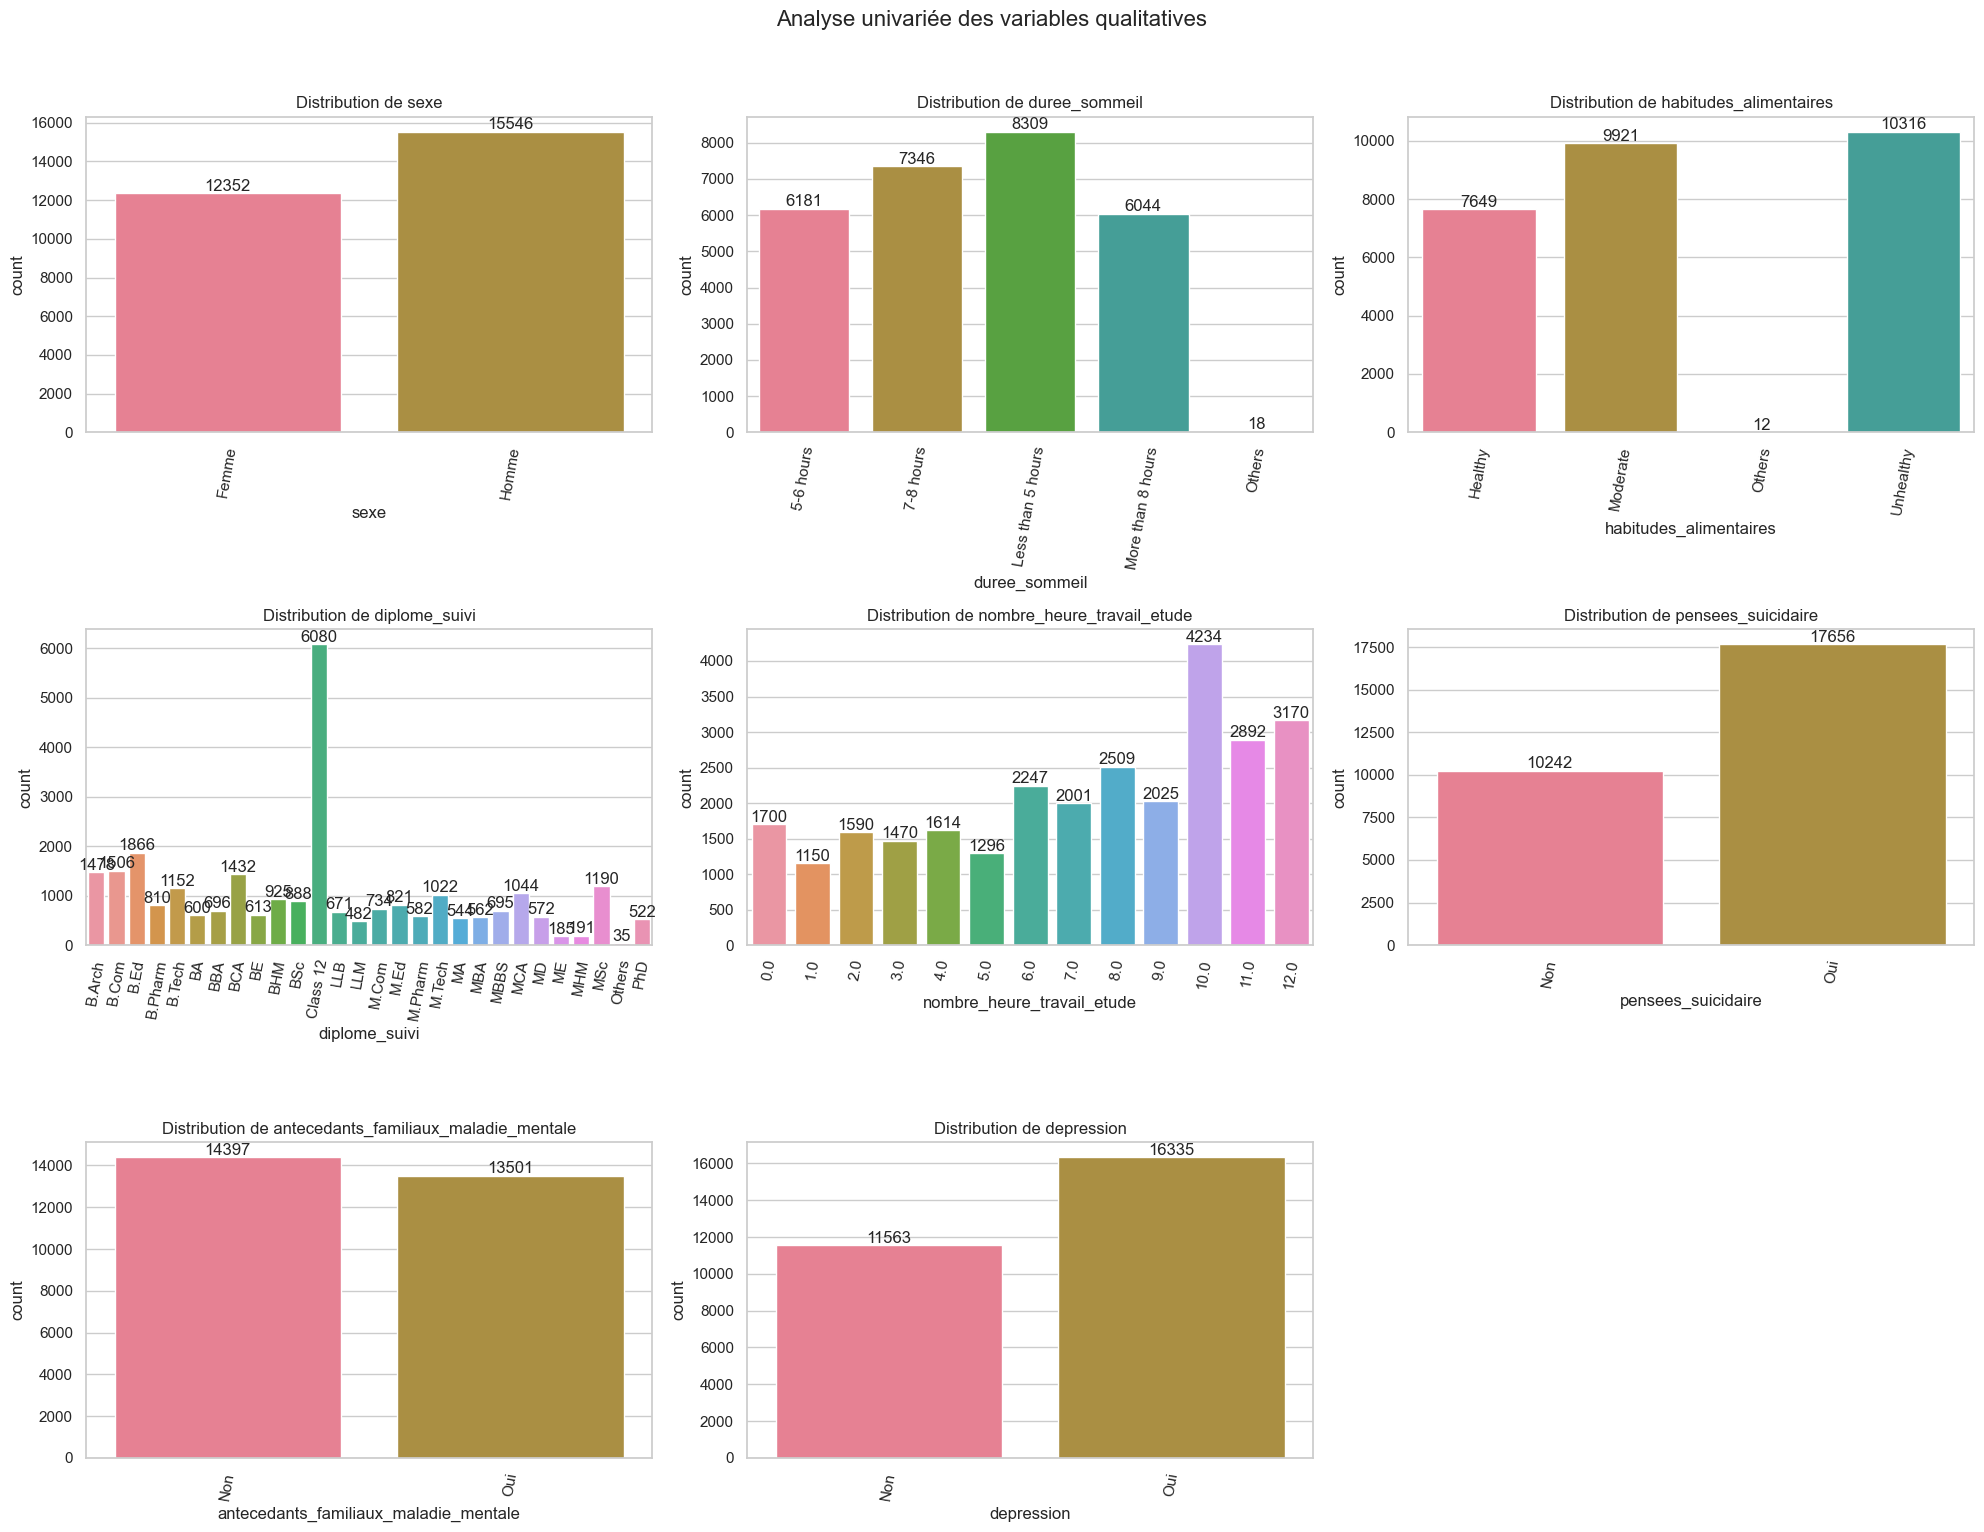

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration du style
sns.set_theme(style="whitegrid")
sns.set_palette("husl")

# Séparation des variables qualitatives et quantitatives
qualitative_vars = ['sexe', 'duree_sommeil', 'habitudes_alimentaires', 'diplome_suivi', 'nombre_heure_travail_etude', 
                    'pensees_suicidaire', 'antecedants_familiaux_maladie_mentale', 'depression']


# Fonction pour afficher le nombre d'individus sur les barres
def annotate_bars(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', 
                   xytext=(0, 5), 
                   textcoords='offset points')

## Visualisation des variables qualitatives
plt.figure(figsize=(20, 15))
plt.suptitle("Analyse univariée des variables qualitatives", y=1.02, fontsize=16)

for i, var in enumerate(qualitative_vars, 1):
    plt.subplot(3, 3, i)
    ax = sns.countplot(x=var, data=data)
    plt.title(f"Distribution de {var}")
    plt.xticks(rotation=80)
    annotate_bars(ax)
    
plt.tight_layout()
plt.savefig('image7.png')
plt.show()

## Etude des variables quantitatives

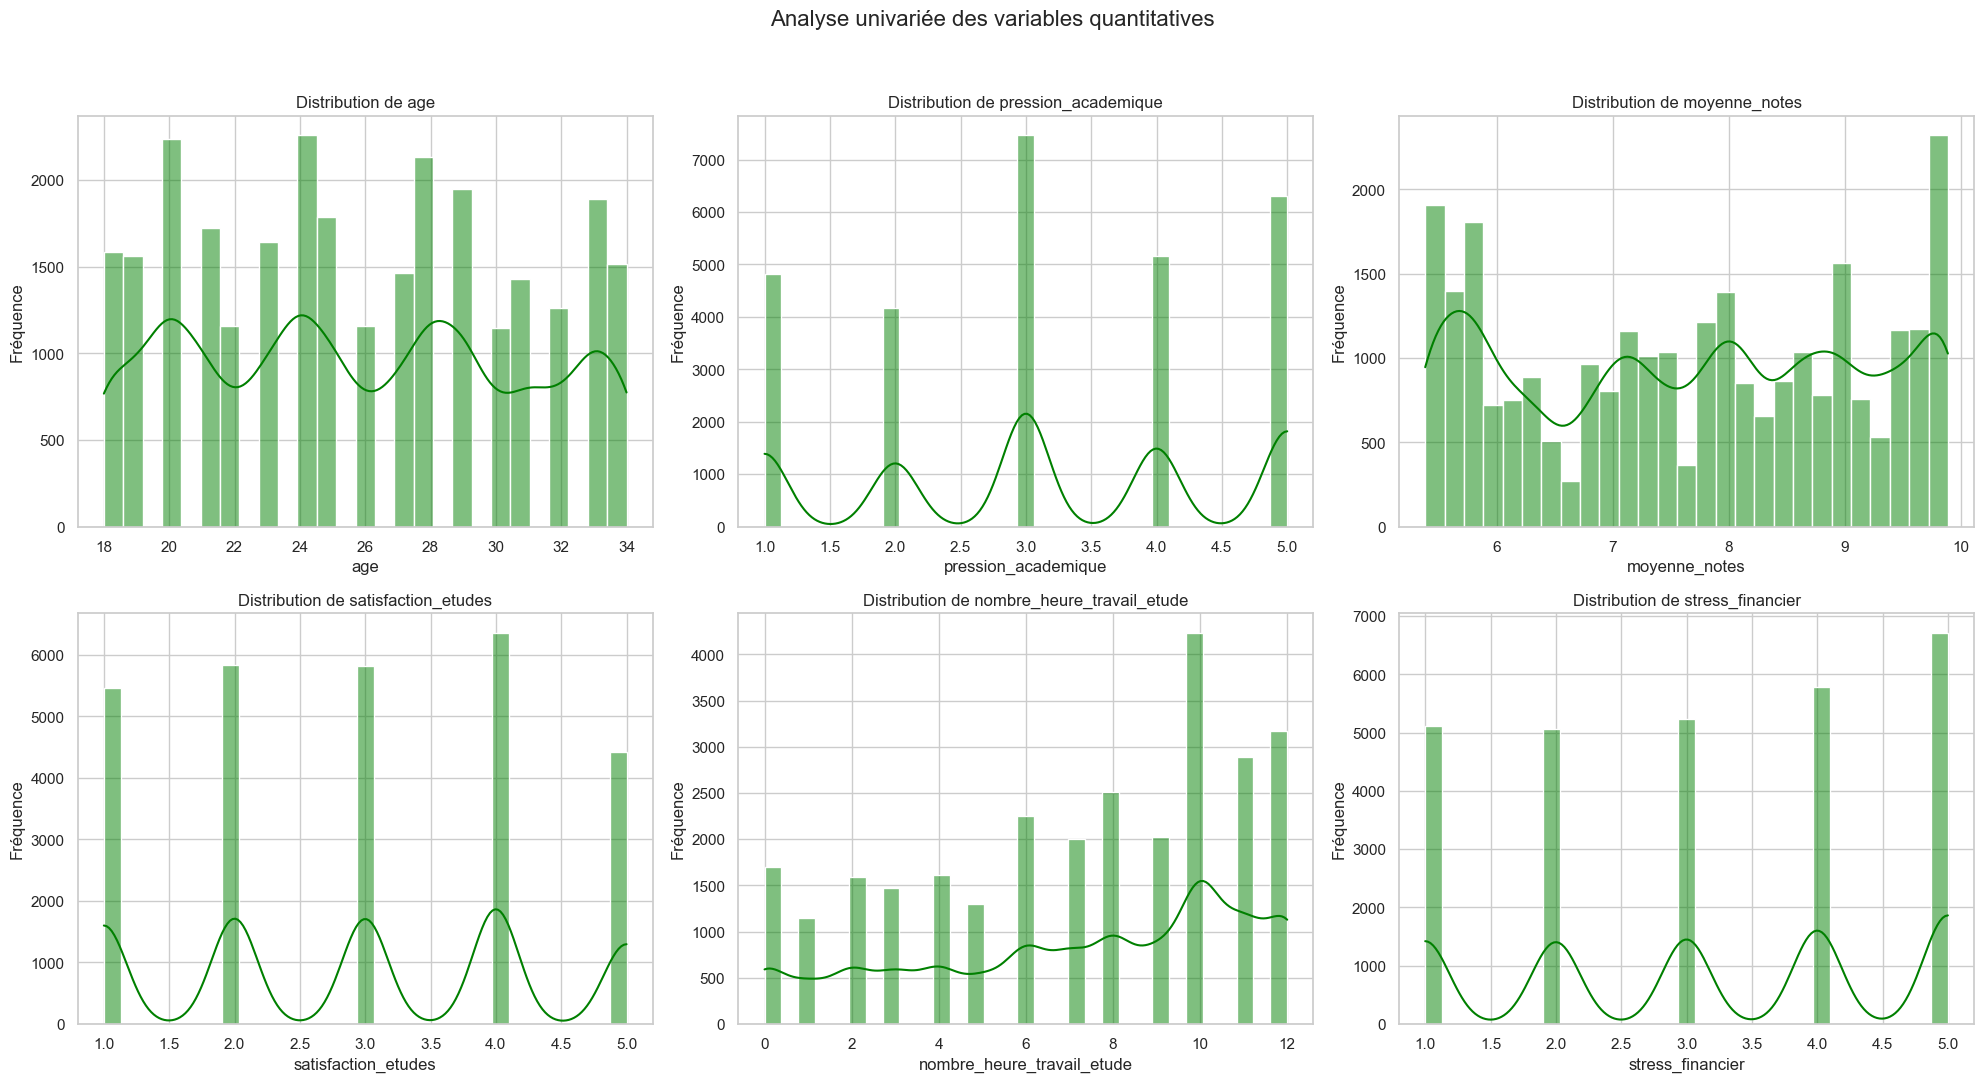

In [71]:
quantitative_vars = ['age', 'pression_academique', 'moyenne_notes', 'satisfaction_etudes', 'nombre_heure_travail_etude', 'stress_financier']

## Visualisation des variables quantitatives
plt.figure(figsize=(20, 15))
plt.suptitle("Analyse univariée des variables quantitatives", y=1.02, fontsize=16)

for i, var in enumerate(quantitative_vars, 1):
    plt.subplot(3, 3, i)
    
    # Histogramme avec densité
    sns.histplot(data[var], kde=True, color='green')
    plt.title(f"Distribution de {var}")
    plt.xlabel(var)
    plt.ylabel("Fréquence")
    
plt.tight_layout()
plt.savefig('image8.png')
plt.show()

## Visualisation spéciale pour les variables clés

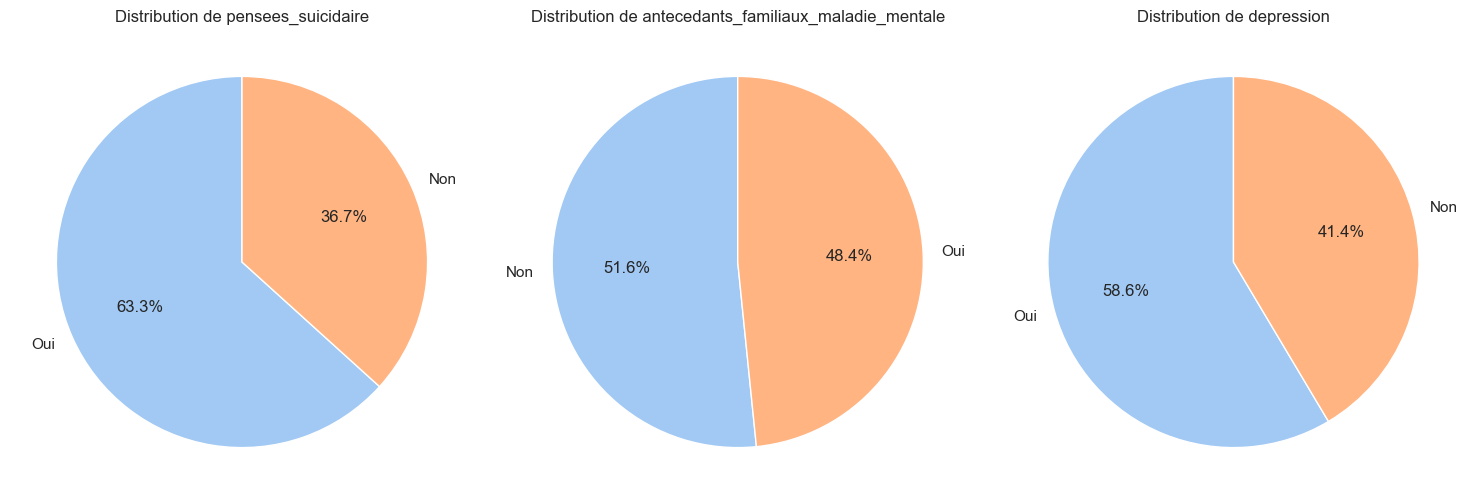

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Appliquer le style Seaborn
sns.set_theme(style="whitegrid")

# Variables qualitatives clés
key_qual_vars = ['pensees_suicidaire', 'antecedants_familiaux_maladie_mentale', 'depression']

# Création de la figure
plt.figure(figsize=(15, 5))

for i, var in enumerate(key_qual_vars, 1):
    plt.subplot(1, 3, i)
    
    # 1. Compter les valeurs
    counts = data[var].value_counts()
    
    # 2. Créer le camembert
    plt.pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        colors=sns.color_palette("pastel"),
        startangle=90,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
    )
    plt.title(f"Distribution de {var}")

plt.tight_layout()
plt.savefig('image9.png')
plt.show()

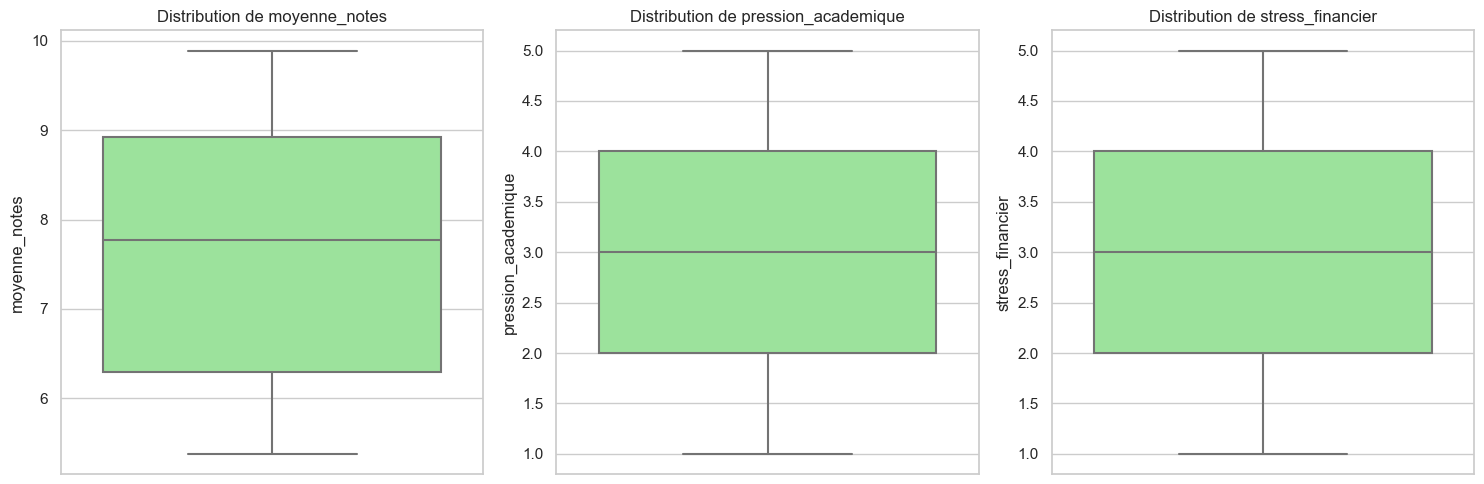

In [74]:
# Variables quantitatives importantes
key_quant_vars = ['moyenne_notes', 'pression_academique', 'stress_financier']
plt.figure(figsize=(15, 5))

for i, var in enumerate(key_quant_vars, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data[var], color='lightgreen')
    plt.title(f"Distribution de {var}")
    
plt.tight_layout()
plt.savefig('image10.png')
plt.show()

# Analyse bivariée

## Normalité

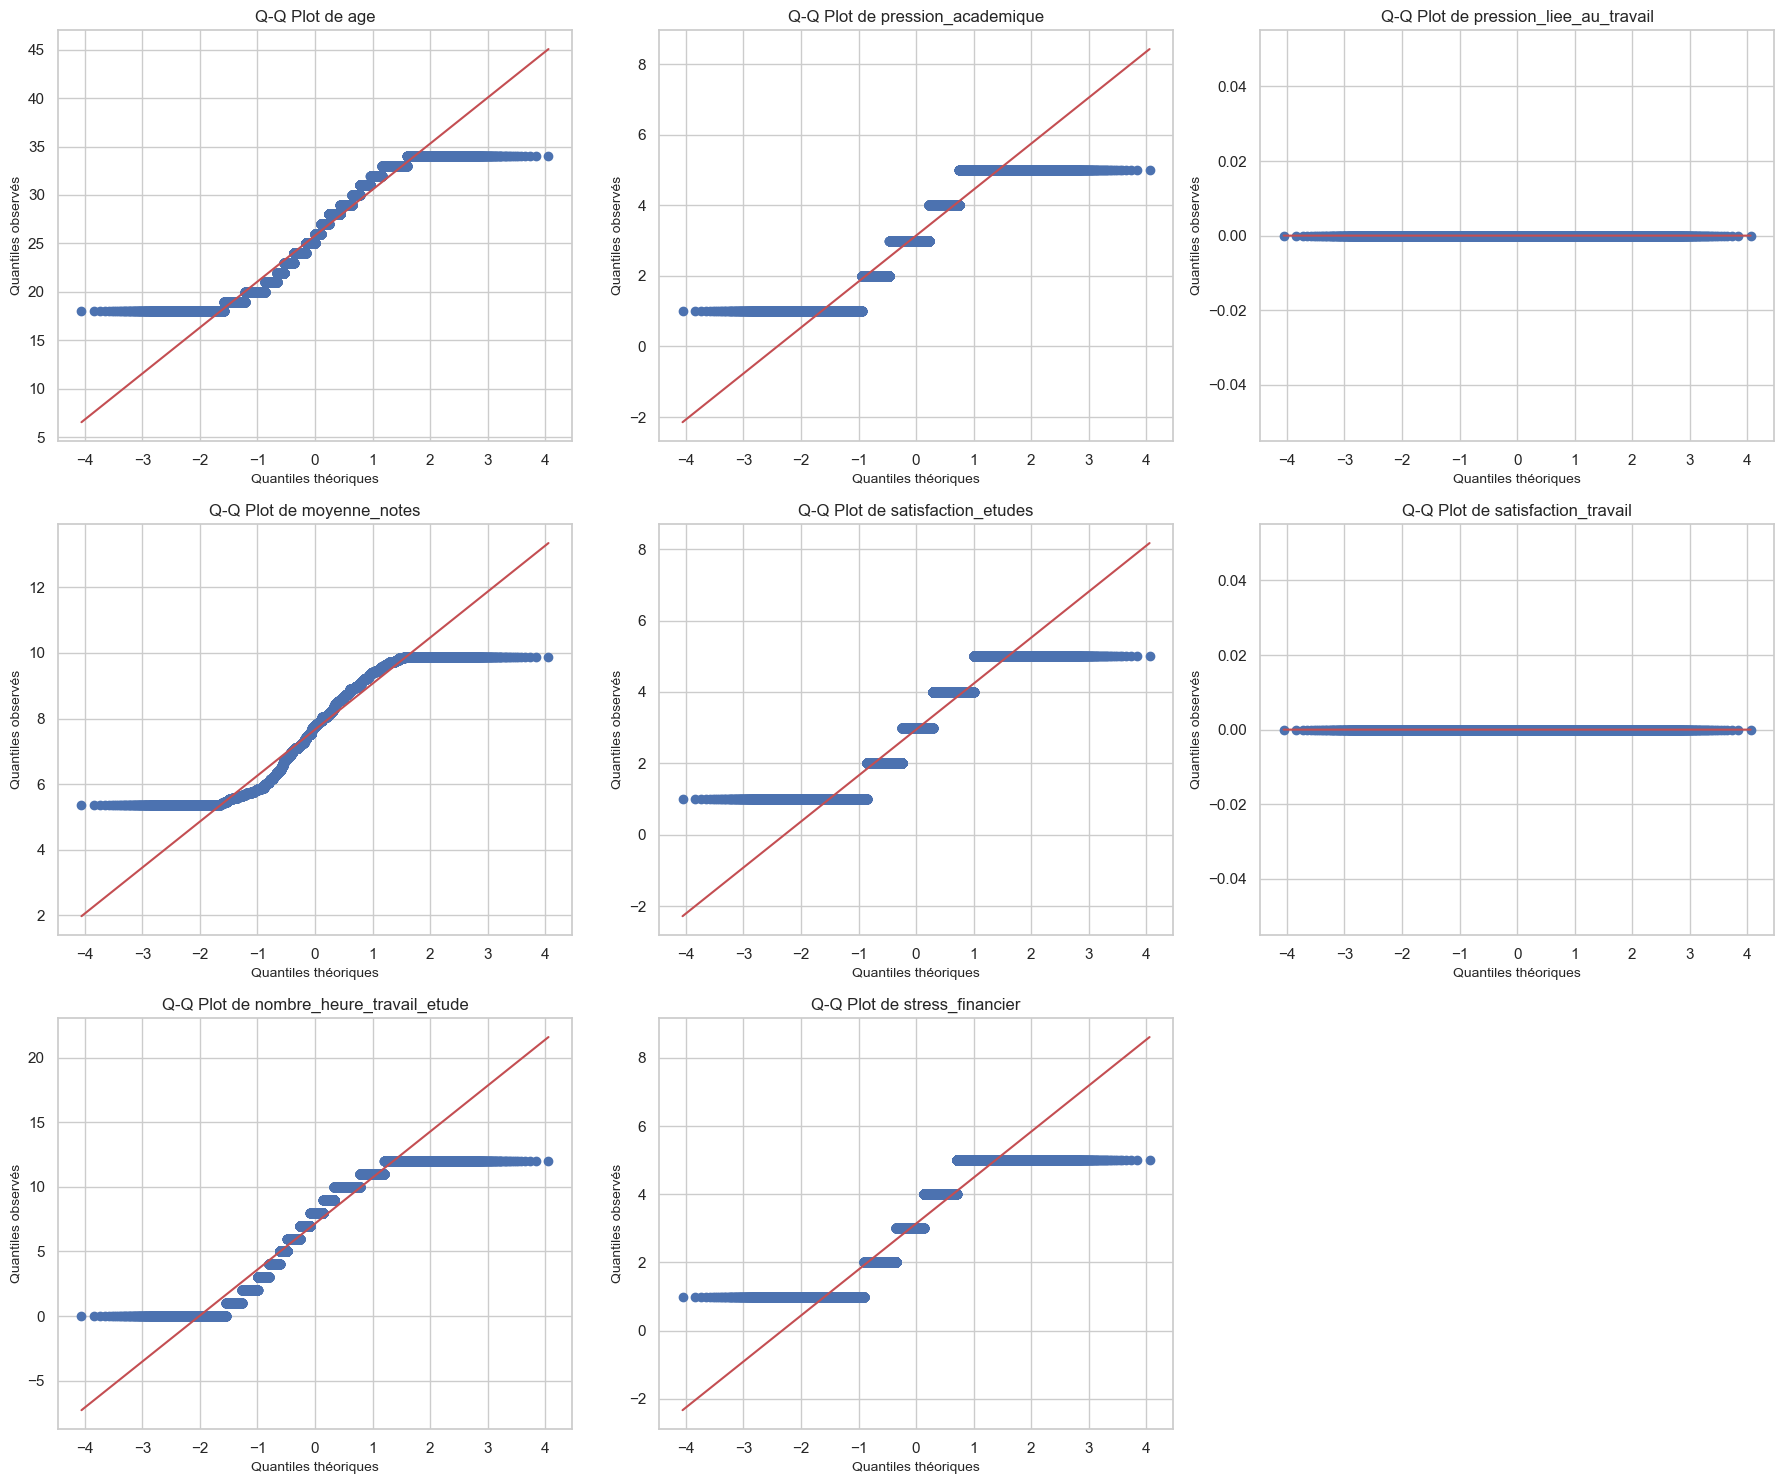

In [77]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# Sélection des colonnes quantitatives
quant_cols = data.select_dtypes(include=['float64', 'int64']).columns
n_cols = 3  # Nombre de colonnes dans la grille
n_rows = (len(quant_cols) // n_cols + 1)  # Calcul automatique des lignes

# Création de la figure
plt.figure(figsize=(18, n_rows * 5))  # Ajustement dynamique de la hauteur

# Génération des Q-Q Plots dans la grille
for idx, col in enumerate(quant_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    stats.probplot(data[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot de {col}', fontsize=12)
    plt.xlabel('Quantiles théoriques', fontsize=10)
    plt.ylabel('Quantiles observés', fontsize=10)

plt.tight_layout()  # Ajustement automatique des espacements
plt.savefig('image11.png')
plt.show()

In [78]:
from scipy.stats import shapiro

for col in data.select_dtypes(include=['float64', 'int64']).columns:
    stat, p = shapiro(data[col].dropna())
    print(f"{col} : Shapiro p-value = {p:.4f}")
    print("→ Normalité rejetée" if p < 0.05 else "→ Normalité acceptée")

age : Shapiro p-value = 0.0000
→ Normalité rejetée
pression_academique : Shapiro p-value = 0.0000
→ Normalité rejetée
pression_liee_au_travail : Shapiro p-value = 1.0000
→ Normalité acceptée
moyenne_notes : Shapiro p-value = 0.0000
→ Normalité rejetée
satisfaction_etudes : Shapiro p-value = 0.0000
→ Normalité rejetée
satisfaction_travail : Shapiro p-value = 1.0000
→ Normalité acceptée
nombre_heure_travail_etude : Shapiro p-value = 0.0000
→ Normalité rejetée
stress_financier : Shapiro p-value = 0.0000
→ Normalité rejetée


C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [79]:
from scipy.stats import kstest

for col in data.select_dtypes(include=['float64', 'int64']).columns:
    stat, p = kstest(data[col].dropna(), 'norm')
    print(f"{col} : KS p-value = {p:.4f}")
    print("→ Normalité rejetée" if p < 0.05 else "→ Normalité acceptée")

age : KS p-value = 0.0000
→ Normalité rejetée
pression_academique : KS p-value = 0.0000
→ Normalité rejetée
pression_liee_au_travail : KS p-value = 0.0000
→ Normalité rejetée
moyenne_notes : KS p-value = 0.0000
→ Normalité rejetée
satisfaction_etudes : KS p-value = 0.0000
→ Normalité rejetée
satisfaction_travail : KS p-value = 0.0000
→ Normalité rejetée
nombre_heure_travail_etude : KS p-value = 0.0000
→ Normalité rejetée
stress_financier : KS p-value = 0.0000
→ Normalité rejetée


In [80]:
from scipy.stats import anderson

for col in data.select_dtypes(include=['float64', 'int64']).columns:
    result = anderson(data[col].dropna())
    print(f"{col} : Anderson-Darling = {result.statistic:.4f}")
    print("Seuils critiques :", result.critical_values)
    print("→ Normalité rejetée" if result.statistic > result.critical_values[2] else "→ Normalité acceptée")

age : Anderson-Darling = 368.0620
Seuils critiques : [0.576 0.656 0.787 0.918 1.092]
→ Normalité rejetée
pression_academique : Anderson-Darling = 970.6121
Seuils critiques : [0.576 0.656 0.787 0.918 1.092]
→ Normalité rejetée
pression_liee_au_travail : Anderson-Darling = nan
Seuils critiques : [0.576 0.656 0.787 0.918 1.092]
→ Normalité acceptée
moyenne_notes : Anderson-Darling = 435.5696
Seuils critiques : [0.576 0.656 0.787 0.918 1.092]
→ Normalité rejetée
satisfaction_etudes : Anderson-Darling = 943.6700
Seuils critiques : [0.576 0.656 0.787 0.918 1.092]
→ Normalité rejetée
satisfaction_travail : Anderson-Darling = nan
Seuils critiques : [0.576 0.656 0.787 0.918 1.092]
→ Normalité acceptée
nombre_heure_travail_etude : Anderson-Darling = 658.2001
Seuils critiques : [0.576 0.656 0.787 0.918 1.092]
→ Normalité rejetée
stress_financier : Anderson-Darling = 1084.0890
Seuils critiques : [0.576 0.656 0.787 0.918 1.092]
→ Normalité rejetée


C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1948: RuntimeWarning: invalid value encountered in divide
  w = (y - xbar) / s


In [81]:
from scipy.stats import jarque_bera
import pandas as pd

# Boucle sur chaque variable quantitative
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    stat, p_value = jarque_bera(data[col].dropna())
    print(f"Variable: {col}")
    print(f"  → Statistique JB = {stat:.3f}, p-value = {p_value:.4f}")
   # print(f"  → Skewness = {skewness:.3f} (0 si normal), Kurtosis = {kurtosis:.3f} (3 si normal)")
    print("  → Conclusion :", "Normalité rejetée" if p_value < 0.05 else "Normalité acceptée", "\n")n

SyntaxError: invalid syntax (2449347001.py, line 10)

# Pour une variables quanti et quali

### Analyse de la relation entre l’âge et la dépression

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='depression', y='age', data=data, palette=['skyblue', 'salmon'])
plt.title('Distribution de l\'Âge par Statut Dépressif')
plt.xlabel('Dépression')
plt.ylabel('Âge')
plt.savefig('image12.png')
plt.show()

### Analyse de la relation entre la pression académique et la dépression

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='depression', y='pression_academique', data=data, palette=['yellow', 'pink'])
plt.title('Distribution de la pression_academique par Statut Dépressif')
plt.xlabel('Dépression')
plt.ylabel('pression_academique')
plt.savefig('image13.png')
plt.show()

### Analyse de la relation entre la pression liée au travail et la dépression

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='depression', y='pression_liee_au_travail', data=data, palette=['orange', 'green'])
plt.title('Distribution de la pression_liee_au_travail par Statut Dépressif')
plt.xlabel('Dépression')
plt.ylabel('pression_liee_au_travail')
plt.savefig('image14.png')
plt.show() 

### Analyse de la relation entre moyenne_notes et la dépression

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='depression', y='moyenne_notes', data=data, palette=['pink', 'purple'])
plt.title('Distribution de la moyenne_notes par Statut Dépressif')
plt.xlabel('Dépression')
plt.ylabel('moyenne_notes')
plt.savefig('image15.png')
plt.show()

### analyse de la relation entre la satisfaction étude et la dépression

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='depression', y='satisfaction_etudes', data=data, palette=['yellow', 'navy'])
plt.title('Distribution de la satisfaction_etudes par Statut Dépressif')
plt.xlabel('Dépression')
plt.ylabel('satisfaction_etudes')
plt.savefig('image16.png')
plt.show()

### analyse de la relation entre la satisfaction travail et la dépression

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='depression', y='satisfaction_travail', data=data, palette=['skyblue', 'lime'])
plt.title('Distribution du satisfaction_travail par Statut Dépressif')
plt.xlabel('Dépression')
plt.ylabel('satisfaction_travail')
plt.savefig('image17.png')
plt.show() 

### Analyse de la relation entre le nombre d'heure de travail ou étude et la dépression

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='depression', y='nombre_heure_travail_etude', data=data, palette=['skyblue', 'lime'])
plt.title('Distribution du nombre_heure_travail_etude par Statut Dépressif')
plt.xlabel('Dépression')
plt.ylabel('nombre_heure_travail_etude')
plt.savefig('image18.png')
plt.show()

### Analyse de la relation entre le stress financier et la dépression

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='depression', y='stress_financier', data=data, palette=['purple', 'red'])
plt.title('Distribution du stress_financier par Statut Dépressif')
plt.xlabel('Dépression')
plt.ylabel('stress_financier')
plt.savefig('image19.png')
plt.show()

### Calcul du rappport de corrélation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


def eta_squared(quantitative_series, qualitative_series):
    # Suppression des NaN
    df = pd.DataFrame({'quant': quantitative_series, 'qual': qualitative_series}).dropna()
    quant = df['quant']
    qual = df['qual']
    
    # Moyennes par groupe et globale
    group_means = quant.groupby(qual).mean()
    overall_mean = quant.mean()
    
    # Variance inter-groupes (Between-Group)
    between_group = sum((group_means - overall_mean)**2 * quant.groupby(qual).count())
    
    # Variance totale (Total)
    total_variance = sum((quant - overall_mean)**2)
    
    # Calcul du eta² (rapport de corrélation)
    eta_sq = between_group / total_variance if total_variance != 0 else 0
    return eta_sq

# Appliquer à toutes les variables quantitatives
quant_cols = data.select_dtypes(include=['float64', 'int64']).columns
depression_col = 'depression'  # Remplacez par le nom exact de votre colonne

results = {}
for col in quant_cols:
    results[col] = eta_squared(data[col], data[depression_col])

# Création d'un DataFrame pour afficher les résultats
eta_results = pd.DataFrame.from_dict(results, orient='index', columns=['Eta²'])
print(eta_results.sort_values(by='Eta²', ascending=False))

# Visualisation des Eta²
eta_results.sort_values(by='Eta²', ascending=True).plot.barh(figsize=(10, 6))
plt.title('Rapport de Corrélation (η²) entre Dépression et Variables Quantitatives')
plt.xlabel('Eta²')
plt.ylabel('Variables quantitatives')
plt.savefig('image20.png')
plt.show()

### Test de liaison

H0: Pas de liaison significative

H0: Liaison significative

In [ ]:
from scipy.stats import mannwhitneyu

depression_groups = data.groupby('depression')  # 'depression' est binaire (0/1)

for col in data.select_dtypes(include=['float64', 'int64']).columns:
    group1 = depression_groups.get_group("Non")[col].dropna()  # Groupe sans dépression
    group2 = depression_groups.get_group("Oui")[col].dropna()  # Groupe avec dépression
    stat, p = mannwhitneyu(group1, group2)
    print(f"{col} vs dépression: p-value = {p:.4f}")
    print("→ Liaison significative" if p < 0.05 else "→ Pas de liaison significative\n")

# Pour deux variables quali

### Analyse de la relation entre le sexe et la dépression

In [ ]:
# Créer un tableau croisé (tableau de contingence) des données 
contingency_table = pd.crosstab(data['depression'], data['sexe']) 
print(contingency_table)

# Traçage 
contingency_table.plot(kind="bar", stacked=True, figsize=(10,6)) 
plt.title("Distribution du sexe par Statut Dépressif") 
plt.ylabel("Count") 
plt.xlabel("depression") 
plt.legend(title="sexe")
plt.xticks(rotation=0)
plt.savefig('image21.png')
plt.show() 

### Analyse de la relation entre la ville et la dépression

In [ ]:
# Créer un tableau croisé (tableau de contingence) des données 
contingency_table = pd.crosstab(data['depression'], data['ville']) 
print(contingency_table)

# Traçage 
contingency_table.plot(kind="bar", stacked=True, figsize=(10,6)) 
plt.title("Distribution de la ville par Statut Dépressif") 
plt.ylabel("Count") 
plt.xlabel("depression") 
plt.legend(title="ville") 
plt.xticks(rotation=0)
plt.savefig('image22.png')
plt.show() 

### Analyse de la relation entre la profession et la dépression

In [ ]:
# Créer un tableau croisé (tableau de contingence) des données 
contingency_table = pd.crosstab(data['depression'], data['profession']) 
print(contingency_table)

# Traçage 
contingency_table.plot(kind="bar", stacked=True, figsize=(10,6)) 
plt.title("Distribution de la profession par Statut Dépressif") 
plt.ylabel("Count") 
plt.xlabel("depression") 
plt.legend(title="profession") 
plt.xticks(rotation=0)
plt.savefig('image31.png')
plt.show() 

### Analyse de la relation entre la durée de sommeil et la dépression

In [ ]:
# Créer un tableau croisé (tableau de contingence) des données 
contingency_table = pd.crosstab(data['depression'], data['duree_sommeil']) 
print(contingency_table)

# Traçage 
contingency_table.plot(kind="bar", stacked=True, figsize=(10,6)) 
plt.title("Distribution de la duree_sommeil par Statut Dépressif") 
plt.ylabel("Count") 
plt.xlabel("depression") 
plt.legend(title="duree_sommeil")
plt.xticks(rotation=0)
plt.savefig('image23.png')
plt.show() 

In [ ]:
# Créer le diagramme à barres groupées 
plt.figure(figsize=(10,6)) 
 
# Utilisation de Seaborn pour un diagramme à barres groupées 
sns.countplot(data=data, x='depression', hue='duree_sommeil') 
 
# Ajouter des titres et des étiquettes 
plt.title('diagramme en bâtons groupés') 
plt.ylabel('Count') 
plt.legend(title='duree_sommeil') 
 
# Afficher le trace 
plt.tight_layout() 
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Nettoyage des noms de colonnes
data.columns = data.columns.str.strip()

# Table de contingence avec pourcentages par durée de sommeil
table = pd.crosstab(data['duree_sommeil'], data['depression'], normalize='index') * 100

# Remise en forme pour le barplot
table = table.reset_index().melt(id_vars='duree_sommeil', var_name='Dépression', value_name='Pourcentage')

# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=table, x='duree_sommeil', y='Pourcentage', hue='Dépression', palette='Set2')

plt.title("Répartition en pourcentage de la dépression selon la durée du sommeil")
plt.xlabel("Durée du sommeil")
plt.ylabel("Pourcentage (%)")
plt.xticks(rotation=15)
plt.legend(title="Dépression")
plt.tight_layout()
plt.show()


### Analyse de la relation entre les habitudes alimentaires et la dépression

In [ ]:
# Créer un tableau croisé (tableau de contingence) des données 
contingency_table = pd.crosstab(data['depression'], data['habitudes_alimentaires']) 
print(contingency_table)

# Traçage 
contingency_table.plot(kind="bar", stacked=True, figsize=(10,6)) 
plt.title("Distribution des habitudes_alimentaires par Statut Dépressif") 
plt.ylabel("Count") 
plt.xlabel("depression") 
plt.legend(title="habitudes_alimentaires") 
plt.xticks(rotation=0)
plt.savefig('image24.png')
plt.show()

### Analyse de la relation entre le diplôme suivi et la dépression

In [ ]:
# Créer un tableau croisé (tableau de contingence) des données 
contingency_table = pd.crosstab(data['depression'], data['diplome_suivi']) 
print(contingency_table)

# Traçage 
contingency_table.plot(kind="bar", stacked=True, figsize=(10,6)) 
plt.title("Distribution du diplôme suivi par Statut Dépressif") 
plt.ylabel("Count") 
plt.xlabel("depression") 
plt.legend(title="diplome_suivi") 
plt.xticks(rotation=0)
plt.savefig('image25.png')
plt.show()

### Analyse de la relation entre la pensée suicidaire et la dépression

In [ ]:
# Créer un tableau croisé (tableau de contingence) des données 
contingency_table = pd.crosstab(data['depression'], data['pensees_suicidaire']) 
print(contingency_table)

# Traçage 
contingency_table.plot(kind="bar", stacked=True, figsize=(10,6)) 
plt.title("Distribution des pensées suicidaires par Statut Dépressif") 
plt.ylabel("Count") 
plt.xlabel("depression") 
plt.legend(title="pensees_suicidaire")
plt.xticks(rotation=0)
plt.savefig('image26.png')
plt.show()

### Analyse de la relation entre les antécédants familiaux de maladie mentale et la dépression

In [ ]:
# Créer un tableau croisé (tableau de contingence) des données 
contingency_table = pd.crosstab(data['depression'], data['antecedants_familiaux_maladie_mentale']) 
print(contingency_table)

# Traçage 
contingency_table.plot(kind="bar", stacked=True, figsize=(10,6)) 
plt.title("Distribution des antécédants familiaux de maladie mentale par Statut Dépressif") 
plt.ylabel("Count") 
plt.xlabel("depression") 
plt.legend(title="antecedants_familiaux_maladie_mentale") 
plt.xticks(rotation=0)
plt.savefig('image28.png')
plt.show()

### Calcul du V de Cramer

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(confusion_matrix):
    """Calcule le V de Cramér pour un tableau de contingence"""
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    
    # Correction pour les petits effectifs
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Sélection des variables qualitatives (object, category, bool)
qual_cols = data.select_dtypes(include=['object', 'category', 'bool']).columns
depression_col = 'depression'  # A adapter si le nom est différent

# Calcul pour chaque variable qualitative
results = {}
for col in qual_cols:
    if col != depression_col:  # Éviter de calculer avec elle-même
        confusion_matrix = pd.crosstab(data[col], data[depression_col])
        results[col] = cramers_v(confusion_matrix)

# Création d'un DataFrame pour les résultats
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['V de Cramér'])
results_df = results_df.sort_values(by='V de Cramér', ascending=False)

# Affichage des résultats
print("Force d'association entre les variables qualitatives et la dépression :")
print(results_df)

# Visualisation
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
results_df.plot(kind='barh', color='skyblue')
plt.title('V de Cramér entre la dépression et les variables qualitatives')
plt.xlabel('V de Cramér')
plt.ylabel('Variables qualitatives')
plt.tight_layout()
plt.savefig('image29.png')
plt.show()

### Test de liaison

Il s’agit ici de calculer le khi-deux et de faire le test du khi-deux 
 
H0 : les deux variables ne sont pas liées

H1 : les deux variables sont liées 

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt


# Sélection des variables qualitatives (object, category, bool)
qual_cols = data.select_dtypes(include=['object', 'category', 'bool']).columns
depression_col = 'depression'  # À adapter si nécessaire

results = []

for col in qual_cols:
    if col != depression_col:  # Éviter de tester la variable avec elle-même
        # Création du tableau de contingence
        contingency_table = pd.crosstab(data[depression_col], data[col])
        
        # Test du chi²
        chi2, p, _, expected = chi2_contingency(contingency_table)
        
        # Vérification de la condition de Cochran
        valid_cells = (expected >= 5).sum()
        total_cells = expected.size
        cochran_ok = (valid_cells / total_cells) >= 0.8  # 80% de cellules valides
        
        # Stockage des résultats
        results.append({
            'Variable': col,
            'Chi2': chi2,
            'p-value': p,
            '% cellules valides': (valid_cells / total_cells * 100),
            'Cochran': cochran_ok,
            'Degrés liberté': (contingency_table.shape[0]-1)*(contingency_table.shape[1]-1)
        })

# Création du dataframe de résultats
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='p-value')

# Affichage des résultats
pd.set_option('display.float_format', '{:.3f}'.format)
print("Résultats des tests d'association avec la dépression :")
print(results_df[['Variable', 'Chi2', 'Degrés liberté', 'p-value', '% cellules valides', 'Cochran']])

# Affichage des variables significatives (seuil à 0.05)
print("\nVariables significativement associées (p < 0.05) :")
print(results_df[results_df['p-value'] < 0.05]['Variable'].to_string(index=False))


# Graphique des p-values
plt.figure(figsize=(10, 6))
plt.barh(results_df['Variable'], -np.log10(results_df['p-value']), color='skyblue')
plt.axvline(-np.log10(0.05), color='red', linestyle='--')
plt.title('Significativité des variables qualitatives avec la dépression')
plt.xlabel('p-value')
plt.ylabel('Variables qualitatives')
plt.tight_layout()
plt.savefig('image30.png')
plt.show()

# 1. Intervalle de confiance pour la proportion d'étudiants ayant déjà eu des pensées suicidaires 

In [ ]:
# Vérification des valeurs uniques
print(data['pensees_suicidaire'].value_counts())

# Calcul automatique en détectant la modalité positive
positive_label = 'Oui'  # À adapter selon vos données
count = data['pensees_suicidaire'].value_counts().get(positive_label, 0)
n = len(data.dropna(subset=['pensees_suicidaire']))  # Exclut les NA

prop = count / n
print(f"Proportion observée: {prop:.3f}")

# Intervalle de confiance à 95% (Wilson)
alpha = 0.05
ci_wilson = proportion_confint(count, n, alpha=alpha, method='wilson')

print(f"\nIntervalle de confiance à {(1-alpha)*100}% (Wilson):")
print(f"[{ci_wilson[0]:.4f}, {ci_wilson[1]:.4f}]")

In [ ]:
import numpy as np
import pandas as pd

# Supposons que tu as déjà chargé ton dataset
# data = pd.read_csv("...")  # si ce n'est pas encore fait

# Étape 1 : encoder la variable en binaire
# Ex : "Oui" → 1, "Non" → 0 (adapte selon tes modalités)
data['pensees_suicidaire_bin'] = data['pensees_suicidaire'].map({'Oui': 1, 'Non': 0}).astype(int)

# Étape 2 : initialiser le bootstrap
n_iterations = 1000
sample_size = len(data)
print(sample_size)
bootstrap_props = []

for i in range(n_iterations):
    # Échantillon avec remise
    sample = data['pensees_suicidaire_bin'].sample(n=sample_size, replace=True)
    # Calcul de la proportion
    prop = sample.mean()
    bootstrap_props.append(prop)

# Étape 3 : calcul de l'intervalle de confiance (IC à 95 %)
lower_bound = np.percentile(bootstrap_props, 2.5)*100
upper_bound = np.percentile(bootstrap_props, 97.5)*100

# Affichage des résultats
print(f"Intervalle de confiance à 95 % pour la proportion d'étudiants ayant eu des pensées suicidaires : [{lower_bound:.3f}%, {upper_bound:.3f}%]")


In [ ]:
import scipy.stats as stats 
import numpy as np 
 
def binomial_confidence_interval(succes, essais, alpha=0.05): 
    """ 
    Calcule l'intervalle de confiance pour une proportion à l'aide d'un test 
binomial. 
     
    :param succes: Nombre de succès. 
    :param essais: Nombre total d'essais. 
    :param alpha: Niveau de signification (1 - niveau de confiance). 
     
    :return: Intervalle de confiance bas et haut. 
    """ 
    # Calcul de la proportion 
    p = succes / essais 
 
    # Z-score pour le niveau de confiance donné (par exemple, 1.96 pour 95%) 
    z = stats.norm.ppf(1 - alpha/2) 
     
    # Largeur de l'intervalle de confiance 
    width = z * np.sqrt(p*(1-p) / essais) 
 
    return p - width, p + width

conf_interval = binomial_confidence_interval(17656, 27898) 
print(f"Intervalle de confiance à 95% : {conf_interval}") 

# 2. Estimez la moyenne et la médiane des heures de travail ou d'études pour les étudiants souffrant de dépression

## Fonction de boostrap

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm  # Pour une barre de progression
import seaborn as sns
import matplotlib.pyplot as plt

def bootstrap_ci(data, stat='mean', n_bootstrap=5000, ci=95):
    """
    Calcule l'intervalle de confiance par bootstrap.
    Args:
        data: Array-like (données à analyser).
        stat: 'mean' ou 'median'.
        n_bootstrap: Nombre de rééchantillonnages.
        ci: Niveau de confiance (par défaut 95%).
    Returns:
        (statistique, IC_bas, IC_haut)
    """
    stats = []
    for _ in tqdm(range(n_bootstrap)):
        sample = np.random.choice(data, size=len(data), replace=True)
        if stat == 'mean':
            stats.append(np.mean(sample))
        elif stat == 'median':
            stats.append(np.median(sample))
    
    lower = np.percentile(stats, (100 - ci) / 2)
    upper = np.percentile(stats, ci + (100 - ci) / 2)
    
    if stat == 'mean':
        return np.mean(data), lower, upper
    elif stat == 'median':
        return np.median(data), lower, upper

## Intervalle de confiance

In [ ]:
# Filtrer les étudiants dépressifs
depressifs = data[data['depression'] == 'Oui']
heures_travail = depressifs['nombre_heure_travail_etude'].dropna()  # Supprimer les NaN

# Bootstrap pour la moyenne
moyenne, ci_low_moy, ci_high_moy = bootstrap_ci(heures_travail, stat='mean')
print(f"**Heures de travail/études (Dépressifs)**")
print(f"Moyenne (IC 95%): {moyenne:.1f} heures [{ci_low_moy:.1f}, {ci_high_moy:.1f}]")

# Bootstrap pour la médiane
mediane, ci_low_med, ci_high_med = bootstrap_ci(heures_travail, stat='median')
print(f"Médiane (IC 95%): {mediane:.1f} heures [{ci_low_med:.1f}, {ci_high_med:.1f}]\n")

# 3. Évaluez la moyenne et la médiane du stress financier pour les étudiants avec et sans dépression.

In [ ]:
# Séparation des groupes
stress_depressifs = data[data['depression'] == 'Oui']['stress_financier'].dropna()
stress_non_depressifs = data[data['depression'] == 'Non']['stress_financier'].dropna()

# Fonction pour afficher les résultats
def print_results(stress_data, groupe):
    moyenne, ci_low_moy, ci_high_moy = bootstrap_ci(stress_data, stat='mean')
    mediane, ci_low_med, ci_high_med = bootstrap_ci(stress_data, stat='median')
    print(f"**Stress financier ({groupe})**")
    print(f"Moyenne (IC 95%): {moyenne:.1f} [{ci_low_moy:.1f}, {ci_high_moy:.1f}]")
    print(f"Médiane (IC 95%): {mediane:.1f} [{ci_low_med:.1f}, {ci_high_med:.1f}]\n")

# Résultats
print_results(stress_depressifs, "Avec Dépression")
print_results(stress_non_depressifs, "Sans Dépression")

# 4. La satisfaction des études diffère-t-elle significativement entre les étudiants souffrant de dépression et ceux qui n'en souffrent pas ?  

In [ ]:
# Importations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from tqdm import tqdm

# 1. Préparation des données
depressifs = data[data['depression'] == 'Oui']['satisfaction_etudes'].dropna()
non_depressifs = data[data['depression'] == 'Non']['satisfaction_etudes'].dropna()

# 2. Test de Mann-Whitney U
stat, p_value = mannwhitneyu(depressifs, non_depressifs, alternative='two-sided')
print(f"Test de Mann-Whitney U : p-value = {p_value:.4f}")

# Interprétation
alpha = 0.05
if p_value < alpha:
    print("→ Différence significative (rejet de H0)")
else:
    print("→ Pas de différence significative (échec pour rejeter H0)")

# 5.  Les niveaux de satisfaction au travail diffèrent-ils significativement selon le diplôme suivi ?

Aucune différence car les données de la variable satisfaction_ travail sont constantes et egale à zéro

# 6. La dépression est-elle indépendante des habitudes alimentaires (saines/modérées) ? 

In [ ]:
import pandas as pd
import scipy.stats as stats

# Nettoyage éventuel des colonnes (espace, majuscules...)
data.columns = data.columns.str.strip()

# Création de la table de contingence
table = pd.crosstab(data['depression'], data['habitudes_alimentaires'])

# Affichage de la table
print("Table de contingence :\n", table)

# Test du chi²
chi2, p, dof, expected = stats.chi2_contingency(table)

# Résultats
print(f"\nStatistique de chi² : {chi2:.4f}")
print(f"p-value : {p:.4f}")

# Interprétation
alpha = 0.05
if p < alpha:
    print("❌ Rejet de H0 : la dépression dépend des habitudes alimentaires.")
else:
    print("✅ On ne rejette pas H0 : la dépression est indépendante des habitudes alimentaires.")

# Création de la heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(table, annot=True, fmt="d", cmap="YlGnBu", cbar=True)

plt.title("Relation entre la dépression et les habitudes alimentaires")
plt.xlabel("Habitudes alimentaires")
plt.ylabel("Dépression")
plt.tight_layout()
plt.savefig('image31.png')
plt.show()


# 7. La durée du sommeil (par exemple, moins de 5 heures, 5-6 heures, 7-8 heures) est-elle indépendante de la dépression ? 

In [ ]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Nettoyage éventuel des noms de colonnes
data.columns = data.columns.str.strip()

# Table de contingence
table = pd.crosstab(data['depression'], data['duree_sommeil'])

# Affichage de la table
print("Table de contingence :\n", table)

# Test du Chi²
chi2, p, dof, expected = stats.chi2_contingency(table)

print(f"\nStatistique de chi² : {chi2:.4f}")
print(f"p-value : {p:.4f}")

# Interprétation
alpha = 0.05
if p < alpha:
    print("❌ Rejet de H0 : la dépression dépend de la durée du sommeil.")
else:
    print("✅ On ne rejette pas H0 : la dépression est indépendante de la durée du sommeil.")

# Optionnel : Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(table, annot=True, fmt="d", cmap="YlOrBr", cbar=True)
plt.title("Relation entre dépression et durée du sommeil")
plt.xlabel("Durée du sommeil")
plt.ylabel("Dépression")
plt.xticks(rotation=10)
plt.tight_layout()
plt.savefig('image32.png')
plt.show()
